In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import MDS

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Lettura del data set; selezione delle colonne

In [ ]:
df = pd.read_csv(
    '/content/drive/MyDrive/Data Science Lab/WVS_Cross-National_Wave_7_csv_v6_0.csv')
df

<ipython-input-3-255de0e0a005>:1: DtypeWarning: Columns (346,348,350,580,581,582,583) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,version,doi,A_WAVE,A_YEAR,A_STUDY,B_COUNTRY,B_COUNTRY_ALPHA,C_COW_NUM,C_COW_ALPHA,D_INTERVIEW,...,WVS_Polmistrust_PartyVoter,WVS_LR_MedianVoter,WVS_LibCon_MedianVoter,v2psbars,v2psorgs,v2psprbrch,v2psprlnks,v2psplats,v2xnp_client,v2xps_party
0,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070001,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070002,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070003,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2018,2,20,AND,232,AND,20070005,...,66.964286,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97215,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2020,2,716,ZWE,552,ZIM,716071211,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97216,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2020,2,716,ZWE,552,ZIM,716071212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97217,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2020,2,716,ZWE,552,ZIM,716071213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97218,6-0-0 (2024-04-30),doi.org/10.14281/18241.24,7,2020,2,716,ZWE,552,ZIM,716071214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1 = df.iloc[:, [6] + list(range(424, 456))]
df1

,B_COUNTRY_ALPHA,I_AUTHORITY,I_NATIONALISM,I_DEVOUT,DEFIANCE,I_RELIGIMP,I_RELIGBEL,I_RELIGPRAC,DISBELIEF,I_NORM1,...,I_WOMEDU,EQUALITY,I_HOMOLIB,I_ABORTLIB,I_DIVORLIB,CHOICE,I_VOICE1,I_VOICE2,I_VOI2_00,VOICE
0,AND,0.0,NaN,0.66,0.382580,1.00,0.0,1.000000,0.666667,0.0,...,0.66,0.690000,0.333333,0.111111,0.444444,0.296296,0.00,0.0,0.000,0.000
1,AND,0.0,0.00,0.66,0.220000,1.00,1.0,1.000000,1.000000,0.0,...,0.66,0.690000,0.888889,0.888889,0.888889,0.888889,1.00,0.0,0.500,0.500
2,AND,0.0,0.66,0.66,0.440000,0.66,1.0,1.000000,0.886667,0.0,...,0.66,0.690000,1.000000,0.444444,0.555556,0.666667,0.33,0.5,0.415,0.415
3,AND,0.5,NaN,0.66,0.574580,1.00,1.0,1.000000,1.000000,0.0,...,1.00,0.916667,0.555556,0.333333,0.888889,0.592593,0.33,0.5,0.415,0.415
4,AND,0.5,NaN,0.66,0.574580,0.66,1.0,1.000000,0.886667,0.0,...,0.66,0.690000,0.777778,0.444444,0.666667,0.629630,0.00,0.5,0.250,0.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97215,ZWE,0.0,0.00,0.00,0.000000,0.33,0.0,0.166667,0.165556,1.0,...,0.66,0.220000,0.000000,0.000000,0.000000,0.000000,0.66,0.5,0.580,0.580
97216,ZWE,0.0,1.00,0.00,0.333333,0.00,0.0,0.000000,0.000000,0.0,...,1.00,0.666667,0.000000,0.000000,0.777778,0.259259,1.00,0.0,0.500,0.500
97217,ZWE,0.0,0.00,0.00,0.000000,0.33,0.0,0.333333,0.221111,0.0,...,0.66,0.690000,0.000000,0.000000,0.000000,0.000000,0.33,0.0,0.165,0.165
97218,ZWE,0.0,0.33,0.33,0.220000,0.00,0.0,0.166667,0.055556,0.0,...,0.66,0.690000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000,0.000


# Pulizia: rimpiazzo di "MAC" (Macau) con "CHN" (Cina), e di "NIR" (Irlanda del Nord) con "GBR" (Regno Unito)

In [ ]:
df1['B_COUNTRY_ALPHA'].unique()

array(['AND', 'ARG', 'ARM', 'AUS', 'BGD', 'BOL', 'BRA', 'CAN', 'CHL',
       'CHN', 'COL', 'CYP', 'CZE', 'DEU', 'ECU', 'EGY', 'ETH', 'GBR',
       'GRC', 'GTM', 'HKG', 'IDN', 'IND', 'IRN', 'IRQ', 'JOR', 'JPN',
       'KAZ', 'KEN', 'KGZ', 'KOR', 'LBN', 'LBY', 'MAC', 'MAR', 'MDV',
       'MEX', 'MMR', 'MNG', 'MYS', 'NGA', 'NIC', 'NIR', 'NLD', 'NZL',
       'PAK', 'PER', 'PHL', 'PRI', 'ROU', 'RUS', 'SGP', 'SRB', 'SVK',
       'THA', 'TJK', 'TUN', 'TUR', 'TWN', 'UKR', 'URY', 'USA', 'UZB',
       'VEN', 'VNM', 'ZWE'], dtype=object)

In [ ]:
df1['B_COUNTRY_ALPHA'].replace(
    to_replace={'MAC': 'CHN', 'NIR': 'GBR'}, inplace=True)

<ipython-input-6-70bbf0a57172>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['B_COUNTRY_ALPHA'].replace(


# Statistiche descrittive; rimozione dei record incompleti (da 97220 a 89494 record); istogrammi; correlazioni; distribuzione degli intervistati per paese (grafico a barre)

In [ ]:
df1.describe(include='all')

,B_COUNTRY_ALPHA,I_AUTHORITY,I_NATIONALISM,I_DEVOUT,DEFIANCE,I_RELIGIMP,I_RELIGBEL,I_RELIGPRAC,DISBELIEF,I_NORM1,...,I_WOMEDU,EQUALITY,I_HOMOLIB,I_ABORTLIB,I_DIVORLIB,CHOICE,I_VOICE1,I_VOICE2,I_VOI2_00,VOICE
count,97220,94496.000000,94132.000000,95544.000000,96653.000000,96294.000000,94568.000000,96008.000000,96520.000000,93681.000000,...,95792.000000,96342.000000,89705.000000,94945.000000,95291.000000,95255.000000,94078.000000,92940.000000,91841.000000,95206.000000
unique,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CHN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.287811,0.180968,0.215316,0.232894,0.327671,0.383872,0.533077,0.416716,0.484111,...,0.666989,0.576234,0.339097,0.283798,0.445251,0.353275,0.385355,0.349021,0.366866,0.367562
std,NaN,0.374153,0.247577,0.246482,0.199394,0.364166,0.486330,0.365959,0.337187,0.499750,...,0.301188,0.257771,0.378684,0.332093,0.355807,0.303081,0.324892,0.396206,0.286456,0.284618
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,0.166667,0.111111,0.000000,...,0.660000,0.413333,0.000000,0.000000,0.000000,0.074074,0.000000,0.000000,0.165000,0.165000
50%,NaN,0.000000,0.000000,0.330000,0.220000,0.330000,0.000000,0.500000,0.333333,0.000000,...,0.660000,0.606667,0.222222,0.111111,0.444444,0.296296,0.330000,0.000000,0.330000,0.330000
75%,NaN,0.500000,0.330000,0.330000,0.386667,0.660000,1.000000,1.000000,0.720000,1.000000,...,1.000000,0.750000,0.666667,0.444444,0.777778,0.555556,0.660000,0.500000,0.580000,0.580000


In [ ]:
df1.dropna(
    subset=[
        'DEFIANCE', 'DISBELIEF', 'RELATIVISM', 'SCEPTICISM', 'AUTONOMY',
        'EQUALITY', 'CHOICE', 'VOICE'],
    inplace=True)
df1.size

<ipython-input-8-6f0c43785a71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(


2953302

In [ ]:
indexes = df1.iloc[:, [0, 4, 8, 12, 16, 20, 24, 28, 32]]
indexes

,B_COUNTRY_ALPHA,DEFIANCE,DISBELIEF,RELATIVISM,SCEPTICISM,AUTONOMY,EQUALITY,CHOICE,VOICE
0,AND,0.382580,0.666667,0.0,0.099000,0.666667,0.690000,0.296296,0.000
1,AND,0.220000,1.000000,0.0,0.650100,0.000000,0.690000,0.888889,0.500
2,AND,0.440000,0.886667,0.0,0.374550,1.000000,0.690000,0.666667,0.415
3,AND,0.574580,1.000000,0.0,0.650100,0.000000,0.916667,0.592593,0.415
4,AND,0.574580,0.886667,0.0,0.374550,0.333333,0.690000,0.629630,0.250
...,...,...,...,...,...,...,...,...,...
97215,ZWE,0.000000,0.165556,1.0,0.000000,0.666667,0.220000,0.000000,0.580
97216,ZWE,0.333333,0.000000,0.0,0.773333,0.333333,0.666667,0.259259,0.500
97217,ZWE,0.000000,0.221111,0.0,0.550000,0.000000,0.690000,0.000000,0.165
97218,ZWE,0.220000,0.055556,0.0,0.330000,0.666667,0.690000,0.000000,0.000


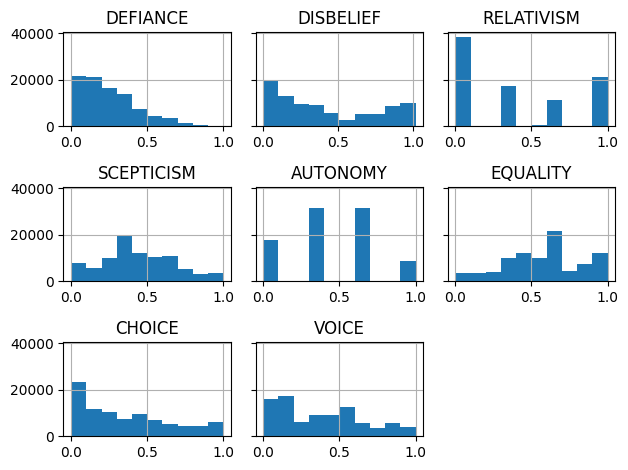

In [ ]:
indexes.hist(sharey=True)
plt.tight_layout()

In [ ]:
(indexes.corr(numeric_only=True)
 .style.background_gradient(cmap='RdBu', axis=None, vmin=-1, vmax=1))

,DEFIANCE,DISBELIEF,RELATIVISM,SCEPTICISM,AUTONOMY,EQUALITY,CHOICE,VOICE
DEFIANCE,1.000000,0.356724,0.113541,0.126068,0.233453,0.188164,0.291528,0.147851
DISBELIEF,0.356724,1.000000,0.077564,0.022953,0.257693,0.274807,0.450225,0.102099
RELATIVISM,0.113541,0.077564,1.000000,0.063780,0.051046,-0.077122,0.199195,0.048962
SCEPTICISM,0.126068,0.022953,0.063780,1.000000,-0.062508,0.117045,0.036437,0.101941
AUTONOMY,0.233453,0.257693,0.051046,-0.062508,1.000000,0.121718,0.209328,0.091553
EQUALITY,0.188164,0.274807,-0.077122,0.117045,0.121718,1.000000,0.422511,0.186746
CHOICE,0.291528,0.450225,0.199195,0.036437,0.209328,0.422511,1.000000,0.214474
VOICE,0.147851,0.102099,0.048962,0.101941,0.091553,0.186746,0.214474,1.000000


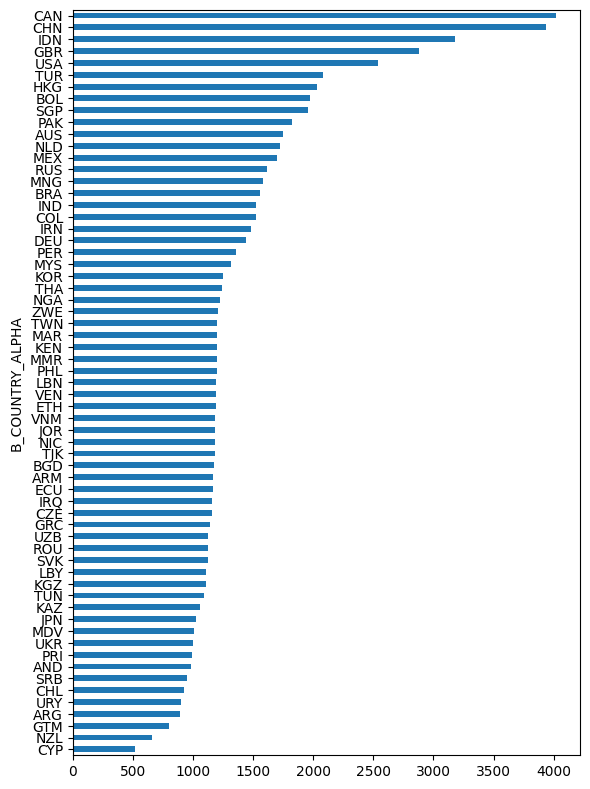

In [ ]:
(indexes['B_COUNTRY_ALPHA'].value_counts(ascending=True)
 .plot.barh(figsize=(6, 8)))
plt.tight_layout()

# Indici medi per paese ("mean_indexes")

In [ ]:
mean_indexes = indexes.groupby(by='B_COUNTRY_ALPHA').mean()
mean_indexes

,DEFIANCE,DISBELIEF,RELATIVISM,SCEPTICISM,AUTONOMY,EQUALITY,CHOICE,VOICE
B_COUNTRY_ALPHA,,,,,,,,
AND,0.317477,0.667209,0.219285,0.448804,0.470808,0.821144,0.716493,0.497649
ARG,0.232448,0.465384,0.387223,0.646421,0.422446,0.701435,0.486628,0.371500
ARM,0.117089,0.315006,0.116716,0.518320,0.354184,0.540881,0.167118,0.160574
AUS,0.262710,0.669868,0.309231,0.339224,0.565234,0.818340,0.693670,0.464546
BGD,0.084851,0.134763,0.364076,0.357076,0.425847,0.386657,0.107031,0.299406
...,...,...,...,...,...,...,...,...
USA,0.292283,0.495941,0.419456,0.385974,0.565681,0.723078,0.562686,0.459695
UZB,0.106755,0.390307,0.476516,0.221915,0.538188,0.346207,0.217257,0.400038
VEN,0.133942,0.408977,0.396919,0.735165,0.277871,0.658154,0.353688,0.349197


# Clustering gerarchico dei paesi ("mean_indexes"), dendrogramma del clustering (9 cluster scegliendo 0.7 come distanza massima); aggiunta della colonna "cluster" delle etichette (0, 1, ..., 8) a "mean_indexes"

In [ ]:
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0.7)
clustering = clustering.fit(mean_indexes)
mean_indexes['cluster'] = clustering.labels_

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)['leaves_color_list']

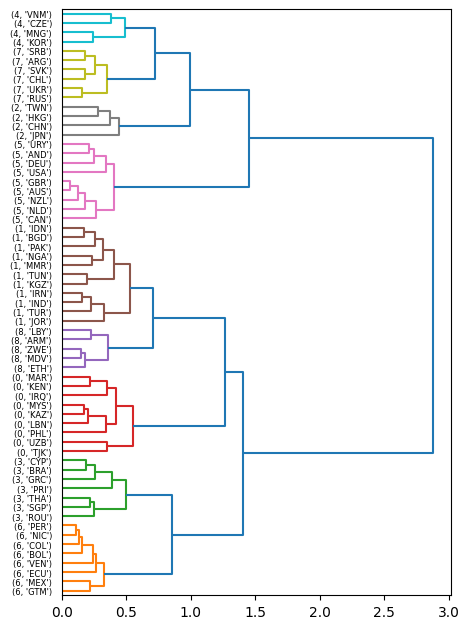

In [ ]:
plt.figure(figsize=(4.8, 6.4))
plot_dendrogram(
    clustering, color_threshold=0.7, orientation='right',
    labels=list(zip(mean_indexes['cluster'], mean_indexes.index)))
plt.tight_layout()

# Caricamento e join del data set integrativo "cartel1" da incrociare con il clustering ottenuto; colonne utili: "Continent" (categorica), "RegimeType2022" (categorica), "Pop2022" (numerica), "GDPpercapita2022" (numerica)

In [ ]:
cartel1 = pd.read_csv(
    '/content/drive/MyDrive/Data Science Lab/Cartel1.csv', index_col='ISO A3',
    encoding='latin-1')
cartel1

,Country,Continent,RegimeType2022,Pop2022,GDP2022,GDPpercapita2022
ISO A3,,,,,,
AFG,Afghanistan,Asia,Authoritarian,41128771.0,1.447000e+10,351.821843
ALA,Åland Islands,Europa,NaN,NaN,NaN,NaN
ALB,Albania,Europa,Flawed democracy,2777689.0,1.431979e+10,5155.290860
DZA,Algeria,Africa,Authoritarian,44903225.0,1.796020e+11,3999.757256
ASM,American Samoa,Oceania,NaN,44273.0,6.627252e+08,14969.059940
...,...,...,...,...,...,...
WLF,Wallis and Futuna,Oceania,NaN,NaN,NaN,NaN
ESH,West Sahara,Africa,NaN,NaN,NaN,NaN
YEM,Yemen,Asia,Authoritarian,33696614.0,2.160616e+10,641.196768


In [ ]:
mean_indexes = mean_indexes.merge(
    cartel1[['Continent', 'RegimeType2022', 'Pop2022', 'GDPpercapita2022']],
    how='left', left_index=True, right_index=True)

In [ ]:
# Tavola di incrocio cluster-continente (percentuali per riga)

(pd.crosstab(
    mean_indexes['cluster'], mean_indexes['Continent'], normalize='index')
 .style.background_gradient(axis=None))

Continent,Africa,America,Asia,Asia-Oceania,Europa,Europa-Asia,Oceania
cluster,,,,,,,
0,0.222222,0.000000,0.666667,0.000000,0.000000,0.111111,0.000000
1,0.181818,0.000000,0.636364,0.090909,0.000000,0.090909,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.285714,0.285714,0.000000,0.285714,0.142857,0.000000
4,0.000000,0.000000,0.750000,0.000000,0.250000,0.000000,0.000000
5,0.000000,0.333333,0.000000,0.000000,0.444444,0.000000,0.222222
6,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.333333,0.000000,0.000000,0.500000,0.166667,0.000000
8,0.600000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Tavola di incrocio cluster-regime (percentuali per riga)

(pd.crosstab(
    mean_indexes['cluster'], mean_indexes['RegimeType2022'], normalize='index')
 .style.background_gradient(axis=None))

RegimeType2022,Authoritarian,Flawed democracy,Full democracy,Hybrid regime
cluster,,,,
0,0.555556,0.222222,0.000000,0.222222
1,0.454545,0.181818,0.000000,0.363636
2,0.250000,0.000000,0.500000,0.250000
3,0.000000,0.857143,0.142857,0.000000
4,0.250000,0.500000,0.250000,0.000000
5,0.000000,0.125000,0.875000,0.000000
6,0.250000,0.125000,0.000000,0.625000
7,0.166667,0.666667,0.000000,0.166667
8,0.750000,0.000000,0.000000,0.250000


In [ ]:
# Medie per cluster ("cluster_indexes")

cluster_indexes = (
    mean_indexes.drop(labels=['Continent', 'RegimeType2022'], axis=1)
    .groupby(by='cluster').mean())
cluster_indexes

,DEFIANCE,DISBELIEF,RELATIVISM,SCEPTICISM,AUTONOMY,EQUALITY,CHOICE,VOICE,Pop2022,GDPpercapita2022
cluster,,,,,,,,,,
0,0.163085,0.282185,0.597601,0.373409,0.430839,0.458878,0.262027,0.332962,3.957682e+07,4939.699398
1,0.162937,0.212518,0.314677,0.364840,0.398684,0.395307,0.143516,0.310653,2.342321e+08,3799.424117
2,0.445530,0.712886,0.308243,0.356639,0.616094,0.594021,0.405638,0.316639,3.921351e+08,30739.601920
3,0.244928,0.339105,0.265483,0.442484,0.435682,0.646274,0.357314,0.381716,4.665639e+07,23856.203933
4,0.320353,0.686117,0.682059,0.425078,0.503110,0.521942,0.441923,0.331751,4.097136e+07,15465.466086
5,0.293357,0.658122,0.326574,0.387860,0.552629,0.799177,0.684732,0.510514,6.392445e+07,45674.772272
6,0.131520,0.312446,0.410779,0.652799,0.316528,0.631369,0.293922,0.415032,3.703260e+07,6983.441132
7,0.281742,0.461671,0.514101,0.543959,0.415736,0.600196,0.429600,0.354488,4.336195e+07,10960.562413
8,0.110587,0.174375,0.145709,0.462956,0.308882,0.526449,0.151799,0.242403,2.996341e+07,5301.101682


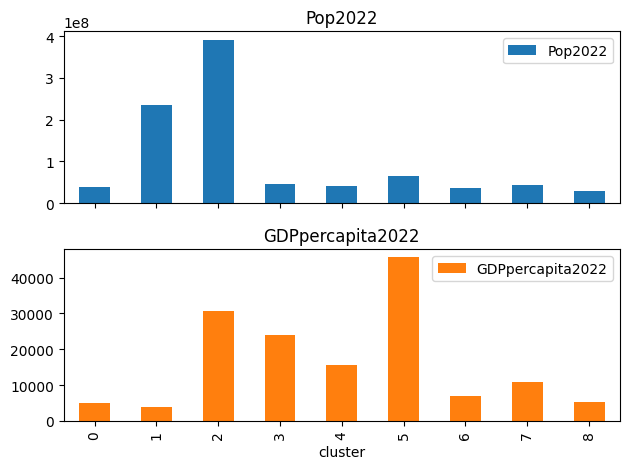

In [ ]:
# Confronti cluster-popolazione e cluster-ricchezza

cluster_indexes[['Pop2022', 'GDPpercapita2022']].plot(kind='bar', subplots=True)
plt.tight_layout()

# Medie per cluster ("cluster_indexes") tra 0 e 1, per valutare la diversa composizione (importanza) degli indici nei cluster

In [ ]:
cluster_indexes.drop(
    labels=['Pop2022', 'GDPpercapita2022'], axis=1, inplace=True)
cluster_indexes.style.background_gradient(
    cmap='RdBu', axis=None, vmin=0, vmax=1.014)

,DEFIANCE,DISBELIEF,RELATIVISM,SCEPTICISM,AUTONOMY,EQUALITY,CHOICE,VOICE
cluster,,,,,,,,
0,0.163085,0.282185,0.597601,0.373409,0.430839,0.458878,0.262027,0.332962
1,0.162937,0.212518,0.314677,0.364840,0.398684,0.395307,0.143516,0.310653
2,0.445530,0.712886,0.308243,0.356639,0.616094,0.594021,0.405638,0.316639
3,0.244928,0.339105,0.265483,0.442484,0.435682,0.646274,0.357314,0.381716
4,0.320353,0.686117,0.682059,0.425078,0.503110,0.521942,0.441923,0.331751
5,0.293357,0.658122,0.326574,0.387860,0.552629,0.799177,0.684732,0.510514
6,0.131520,0.312446,0.410779,0.652799,0.316528,0.631369,0.293922,0.415032
7,0.281742,0.461671,0.514101,0.543959,0.415736,0.600196,0.429600,0.354488
8,0.110587,0.174375,0.145709,0.462956,0.308882,0.526449,0.151799,0.242403


# Multidimensional scaling

In [ ]:
s = (
    indexes.merge(
        mean_indexes['cluster'], left_on='B_COUNTRY_ALPHA', right_index=True)
    .value_counts('cluster', sort=False))

breaking at iteration 96 with stress 0.16611026594909406
breaking at iteration 165 with stress 0.16612617777030744
breaking at iteration 240 with stress 0.3744246106647012
breaking at iteration 49 with stress 0.24680237943444433
breaking at iteration 53 with stress 0.2809450908893929
breaking at iteration 144 with stress 0.16611026542024288
breaking at iteration 134 with stress 0.24674729866601766
breaking at iteration 132 with stress 0.16612677195771963
breaking at iteration 248 with stress 0.21254628171256978


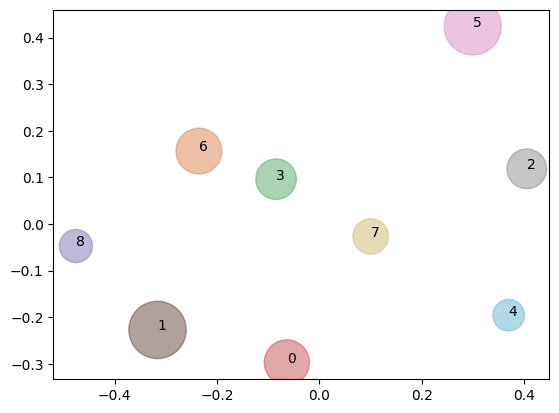

In [ ]:
c = [
    '#c44e52', '#64443c', '#8c8c8c', '#55a868', '#64b5cd', '#da8bc3', '#dd8452',
    '#ccb974', '#8172b3']
mds = MDS(
    n_init=9, max_iter=3000, verbose=1, eps=1e-9, normalized_stress='auto')
mds = mds.fit_transform(cluster_indexes)
plt.scatter(mds[:, 0], mds[:, 1], s=s/10, c=c, alpha=.5)
for i in range(9):
    plt.annotate(i, (mds[i, 0], mds[i, 1]))

breaking at iteration 5 with stress 0.2712479538043383
breaking at iteration 456 with stress 0.03426561560642622
breaking at iteration 6 with stress 0.23189368654396536
breaking at iteration 4 with stress 0.2442907855683979
breaking at iteration 191 with stress 0.03570762262645921
breaking at iteration 4 with stress 0.2625600776362369
breaking at iteration 177 with stress 0.050020601643777675
breaking at iteration 556 with stress 0.08392382608591999
breaking at iteration 35 with stress 0.2018941491860361


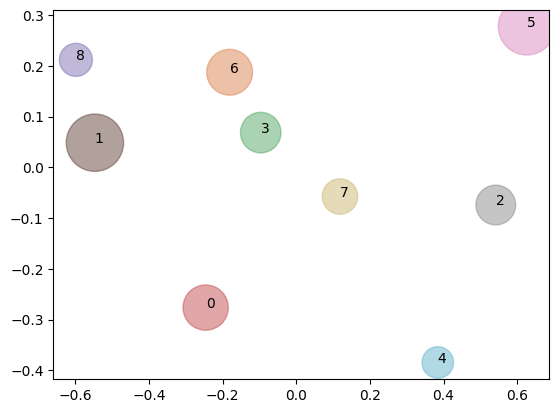

In [ ]:
nmds = MDS(
    metric=False, n_init=9, max_iter=3000, verbose=1, eps=1e-12,
    normalized_stress='auto')
nmds = nmds.fit_transform(cluster_indexes)
plt.scatter(nmds[:, 0], nmds[:, 1], s=s/10, c=c, alpha=.5)
for i in range(9):
    plt.annotate(i, (nmds[i, 0], nmds[i, 1]))

In [ ]:
mean_indexes.iloc[:, 0:9].to_csv(
    path_or_buf='/content/drive/MyDrive/Data Science Lab/mean_indexes.csv')

# Distribuzione geografica dei cluster

In [ ]:
import geopandas as gpd
from matplotlib.colors import ListedColormap

In [ ]:
colors = [
    '#c44e52', '#64443c', '#8c8c8c', '#55a868', '#64b5cd', '#da8bc3', '#dd8452',
    '#ccb974', '#8172b3']
cmap = ListedColormap(colors)

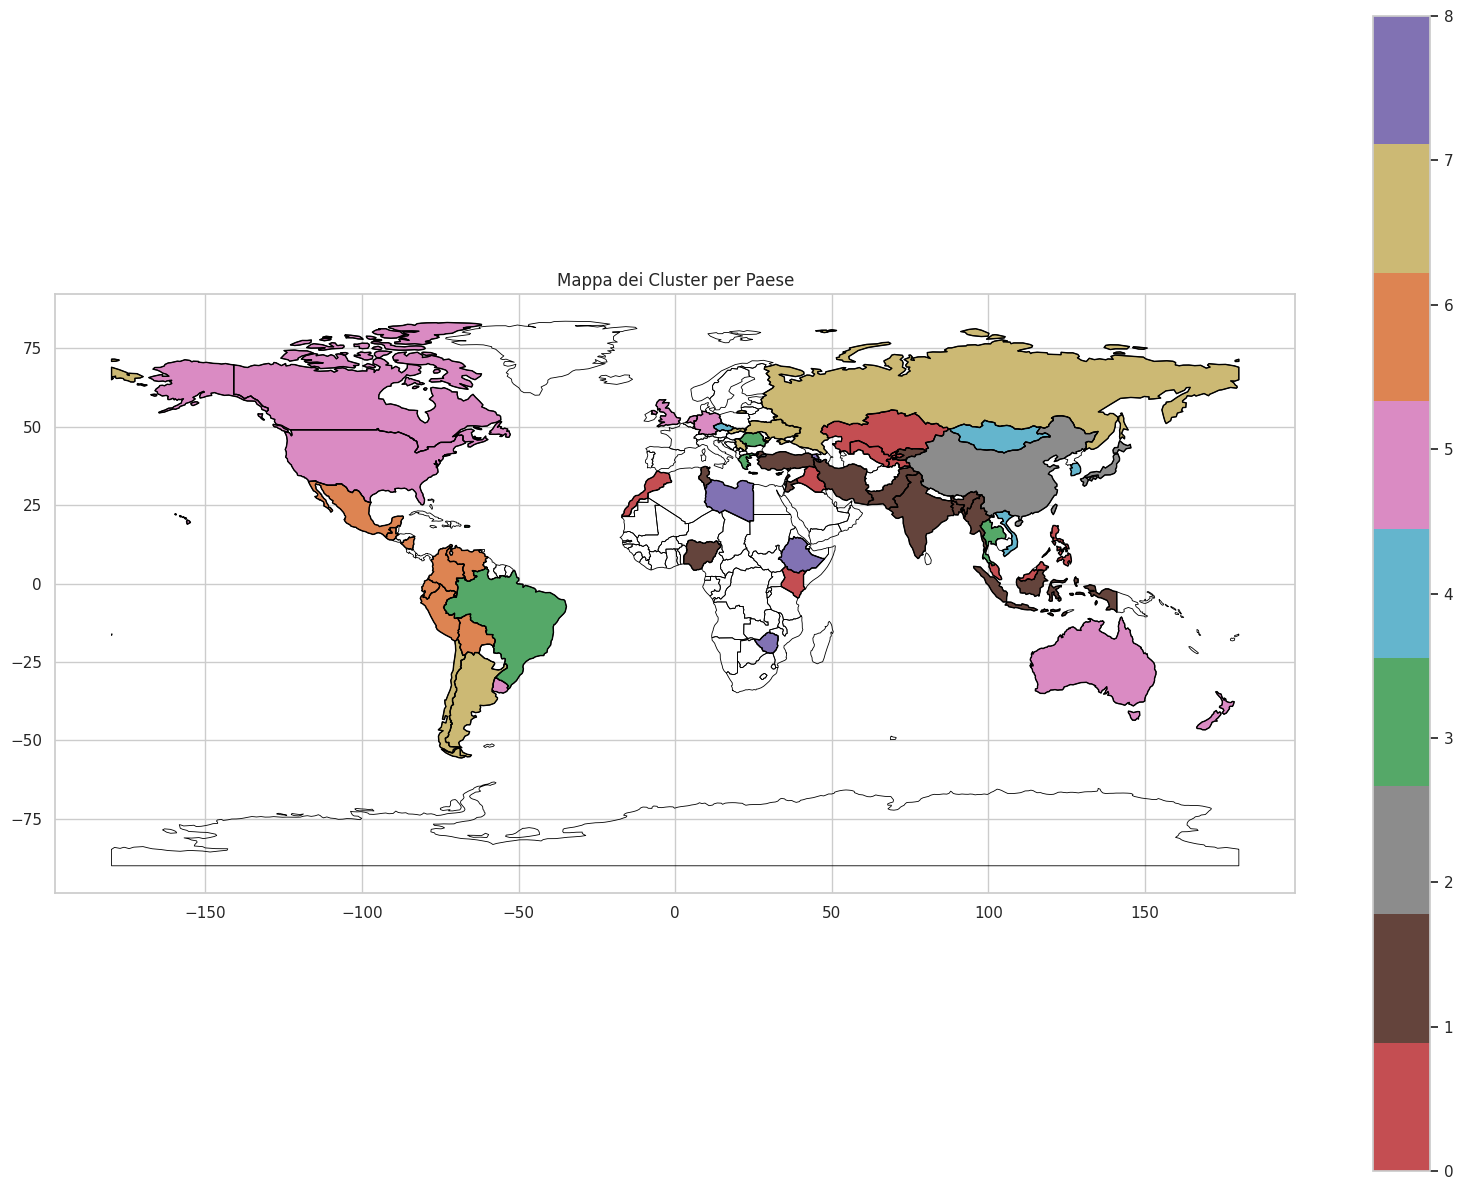

In [ ]:
shapefile_path = '/content/drive/MyDrive/Data Science Lab/data science shp/ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)
# Unisci i dati dei cluster con i dati geografici
world = world.merge(mean_indexes.iloc[:, 0:9], how='left', left_on='ISO_A3_EH', right_on='B_COUNTRY_ALPHA')

# Crea una mappa con i cluster
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
world.plot(column='cluster', ax=ax, legend=True, cmap=cmap, edgecolor='black')
world.boundary.plot(ax=ax, color='black', linewidth=.6)
plt.title('Mappa dei Cluster per Paese')
plt.show()

# UMAP

In [ ]:
%pip install pandas umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.7 MB/s eta 0:00:00


In [ ]:
import umap
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score

In [ ]:
umap_model = umap.UMAP(n_neighbors=10, metric='euclidean', n_components=2, random_state=42)
umap_embedding = umap_model.fit_transform(mean_indexes.iloc[:, 0:8])
mean_indexes['umap1'] = umap_embedding[:, 0]
mean_indexes['umap2'] = umap_embedding[:, 1]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
range_n_clusters = list(range(2, 11))

results={}

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(umap_embedding)

    silhouette_avg = silhouette_score(umap_embedding, cluster_labels)
    results[n_clusters]=silhouette_avg

results

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

{2: 0.5788041,
 3: 0.4834513,
 4: 0.5532434,
 5: 0.5781947,
 6: 0.5895384,
 7: 0.5816944,
 8: 0.56231195,
 9: 0.5665154,
 10: 0.5317802}

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=42)
mean_indexes['kcluster'] = kmeans.fit_predict(umap_embedding)
mean_indexes

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,DEFIANCE,DISBELIEF,RELATIVISM,SCEPTICISM,AUTONOMY,EQUALITY,CHOICE,VOICE,cluster,Continent,RegimeType2022,Pop2022,GDPpercapita2022,umap1,umap2,kcluster
B_COUNTRY_ALPHA,,,,,,,,,,,,,,,,
AND,0.317477,0.667209,0.219285,0.448804,0.470808,0.821144,0.716493,0.497649,5,Europa,NaN,79824.0,39447.538250,9.218071,15.213971,1
ARG,0.232448,0.465384,0.387223,0.646421,0.422446,0.701435,0.486628,0.371500,7,America,Flawed democracy,46234830.0,12940.741860,5.416199,12.440111,4
ARM,0.117089,0.315006,0.116716,0.518320,0.354184,0.540881,0.167118,0.160574,8,Asia,Hybrid regime,2780469.0,5116.205756,5.191724,8.818723,3
AUS,0.262710,0.669868,0.309231,0.339224,0.565234,0.818340,0.693670,0.464546,5,Oceania,Full democracy,26005540.0,60993.542150,9.077559,15.246683,1
BGD,0.084851,0.134763,0.364076,0.357076,0.425847,0.386657,0.107031,0.299406,1,Asia,Hybrid regime,171186372.0,1784.739033,4.193383,8.509618,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USA,0.292283,0.495941,0.419456,0.385974,0.565681,0.723078,0.562686,0.459695,5,America,Flawed democracy,333287557.0,62789.022750,8.854640,14.901771,1
UZB,0.106755,0.390307,0.476516,0.221915,0.538188,0.346207,0.217257,0.400038,0,Asia,Authoritarian,35648100.0,3473.368847,3.352051,9.417939,0
VEN,0.133942,0.408977,0.396919,0.735165,0.277871,0.658154,0.353688,0.349197,6,America,Authoritarian,28301696.0,17043.477540,4.184013,11.969147,6


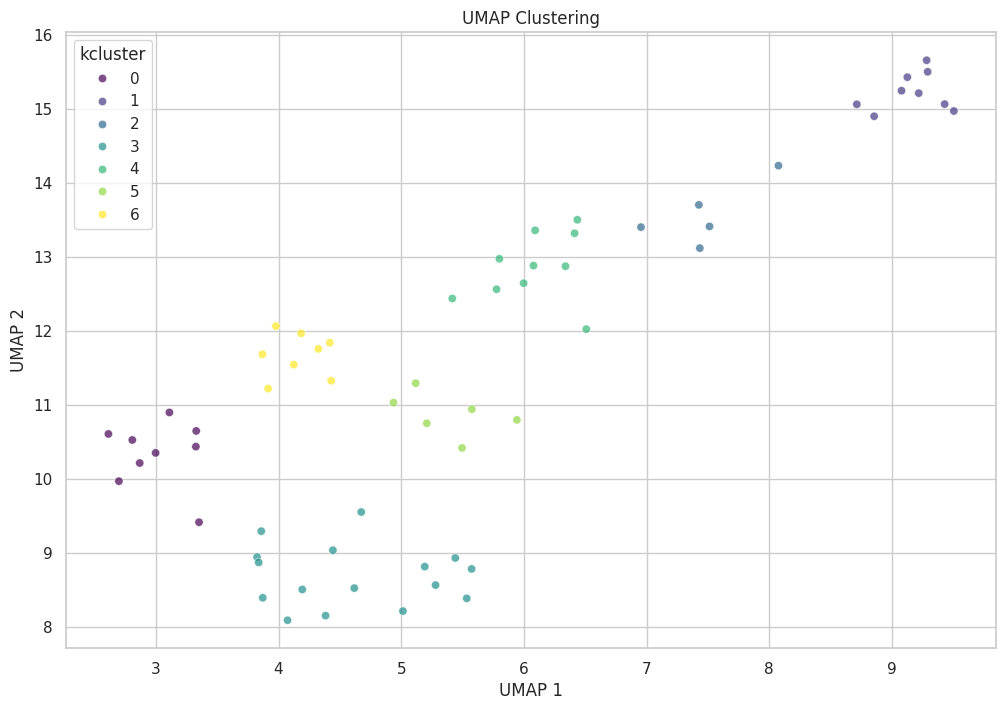

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.scatterplot(
    x='umap1', y='umap2',
    hue='kcluster',
    palette='viridis',
    data=mean_indexes,
    legend="full",
    alpha=0.7
)
plt.title('UMAP Clustering')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()

In [ ]:
silhouette_score(umap_embedding, mean_indexes['kcluster'])

0.5816944

In [ ]:
clusters_grouped = mean_indexes.groupby('kcluster')
for cluster, group in clusters_grouped:
    print(f'\nCluster {cluster}:')
    print(group.index.tolist())


Cluster 0:
['IRQ', 'KAZ', 'KEN', 'LBN', 'MAR', 'MYS', 'PHL', 'TJK', 'UZB']

Cluster 1:
['AND', 'AUS', 'CAN', 'DEU', 'GBR', 'NLD', 'NZL', 'URY', 'USA']

Cluster 2:
['CHN', 'HKG', 'JPN', 'KOR', 'TWN']

Cluster 3:
['ARM', 'BGD', 'ETH', 'IDN', 'IND', 'IRN', 'JOR', 'KGZ', 'LBY', 'MDV', 'MMR', 'NGA', 'PAK', 'TUN', 'TUR', 'ZWE']

Cluster 4:
['ARG', 'CHL', 'CZE', 'MNG', 'RUS', 'SRB', 'SVK', 'THA', 'UKR', 'VNM']

Cluster 5:
['BRA', 'CYP', 'GRC', 'PRI', 'ROU', 'SGP']

Cluster 6:
['BOL', 'COL', 'ECU', 'GTM', 'MEX', 'NIC', 'PER', 'VEN']


# Approfondimento dei cluster gerarchici

In [ ]:
mean_df1 = df1.groupby(by='B_COUNTRY_ALPHA').mean()
mean_df1

,I_AUTHORITY,I_NATIONALISM,I_DEVOUT,DEFIANCE,I_RELIGIMP,I_RELIGBEL,I_RELIGPRAC,DISBELIEF,I_NORM1,I_NORM2,...,I_WOMEDU,EQUALITY,I_HOMOLIB,I_ABORTLIB,I_DIVORLIB,CHOICE,I_VOICE1,I_VOICE2,I_VOI2_00,VOICE
B_COUNTRY_ALPHA,,,,,,,,,,,,,,,,,,,,,
AND,0.304791,0.181706,0.343381,0.317477,0.654602,0.551478,0.795748,0.667209,0.287462,0.239796,...,0.847829,0.821144,0.779823,0.565543,0.805215,0.716493,0.460890,0.535204,0.498703,0.497649
ARG,0.207647,0.176340,0.289450,0.232448,0.465017,0.273908,0.629195,0.465384,0.516892,0.361080,...,0.751196,0.701435,0.561795,0.300402,0.614453,0.486628,0.344088,0.398618,0.370239,0.371500
ARM,0.117201,0.067069,0.151776,0.117089,0.132584,0.163354,0.645064,0.315006,0.115318,0.156947,...,0.711496,0.540881,0.042073,0.165359,0.293452,0.167118,0.248906,0.066144,0.157135,0.160574
AUS,0.265734,0.159375,0.346853,0.262710,0.630568,0.616887,0.760757,0.669868,0.426598,0.327972,...,0.879788,0.818340,0.713081,0.621941,0.750865,0.693670,0.521589,0.407429,0.463869,0.464546
BGD,0.128843,0.061742,0.052980,0.084851,0.022928,0.020246,0.349301,0.134763,0.403928,0.362938,...,0.520357,0.386657,0.077711,0.113768,0.129614,0.107031,0.371657,0.227156,0.299406,0.299406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USA,0.283736,0.279576,0.309150,0.292283,0.432432,0.446952,0.606575,0.495941,0.586166,0.381272,...,0.773680,0.723078,0.613053,0.453974,0.623232,0.562686,0.554395,0.365238,0.459204,0.459695
UZB,0.203892,0.059576,0.045352,0.106755,0.234635,0.525166,0.411938,0.390307,0.736372,0.461264,...,0.407885,0.346207,NaN,0.211861,0.267219,0.217257,0.392302,0.408641,0.401686,0.400038
VEN,0.127731,0.099162,0.173160,0.133942,0.296118,0.434454,0.496359,0.408977,0.475630,0.375630,...,0.687790,0.658154,0.353408,0.204668,0.502988,0.353688,0.359739,0.338655,0.349197,0.349197


In [ ]:
mean_df1['cluster'] = clustering.labels_
mean_df1

,I_AUTHORITY,I_NATIONALISM,I_DEVOUT,DEFIANCE,I_RELIGIMP,I_RELIGBEL,I_RELIGPRAC,DISBELIEF,I_NORM1,I_NORM2,...,EQUALITY,I_HOMOLIB,I_ABORTLIB,I_DIVORLIB,CHOICE,I_VOICE1,I_VOICE2,I_VOI2_00,VOICE,cluster
B_COUNTRY_ALPHA,,,,,,,,,,,,,,,,,,,,,
AND,0.304791,0.181706,0.343381,0.317477,0.654602,0.551478,0.795748,0.667209,0.287462,0.239796,...,0.821144,0.779823,0.565543,0.805215,0.716493,0.460890,0.535204,0.498703,0.497649,5
ARG,0.207647,0.176340,0.289450,0.232448,0.465017,0.273908,0.629195,0.465384,0.516892,0.361080,...,0.701435,0.561795,0.300402,0.614453,0.486628,0.344088,0.398618,0.370239,0.371500,7
ARM,0.117201,0.067069,0.151776,0.117089,0.132584,0.163354,0.645064,0.315006,0.115318,0.156947,...,0.540881,0.042073,0.165359,0.293452,0.167118,0.248906,0.066144,0.157135,0.160574,8
AUS,0.265734,0.159375,0.346853,0.262710,0.630568,0.616887,0.760757,0.669868,0.426598,0.327972,...,0.818340,0.713081,0.621941,0.750865,0.693670,0.521589,0.407429,0.463869,0.464546,5
BGD,0.128843,0.061742,0.052980,0.084851,0.022928,0.020246,0.349301,0.134763,0.403928,0.362938,...,0.386657,0.077711,0.113768,0.129614,0.107031,0.371657,0.227156,0.299406,0.299406,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USA,0.283736,0.279576,0.309150,0.292283,0.432432,0.446952,0.606575,0.495941,0.586166,0.381272,...,0.723078,0.613053,0.453974,0.623232,0.562686,0.554395,0.365238,0.459204,0.459695,5
UZB,0.203892,0.059576,0.045352,0.106755,0.234635,0.525166,0.411938,0.390307,0.736372,0.461264,...,0.346207,NaN,0.211861,0.267219,0.217257,0.392302,0.408641,0.401686,0.400038,0
VEN,0.127731,0.099162,0.173160,0.133942,0.296118,0.434454,0.496359,0.408977,0.475630,0.375630,...,0.658154,0.353408,0.204668,0.502988,0.353688,0.359739,0.338655,0.349197,0.349197,6


In [ ]:
mean_df1.groupby(by='cluster').mean().iloc[:, 0:3]

,I_AUTHORITY,I_NATIONALISM,I_DEVOUT
cluster,,,
0,0.207676,0.166568,0.111496
1,0.296221,0.092374,0.093994
2,0.634494,0.319040,0.370220
3,0.330116,0.174859,0.219289
4,0.373332,0.283538,0.300803
5,0.269082,0.223640,0.352462
6,0.127950,0.099619,0.162851
7,0.287468,0.246661,0.289663
8,0.142388,0.105285,0.078224
